# Intro 

In [2]:
#Import the needed packages for analysis and visulization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [4]:
#Load and create df
df = pd.read_csv('C:/Users/JR/Documents/Data Science Class/Capstone 2/survey.csv')

In [5]:
#check to see if Data frame is available and basic info about data
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

# Data Analysis and Visulization

In [9]:
#Clean Data to be used for Analysis 
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

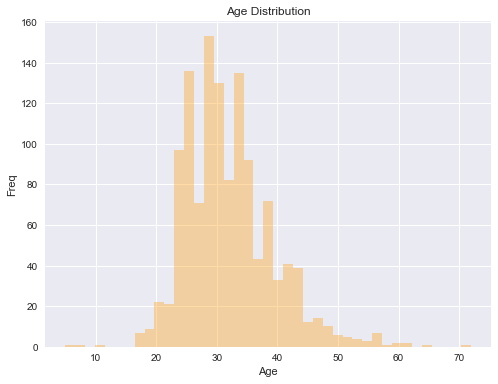

In [10]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')

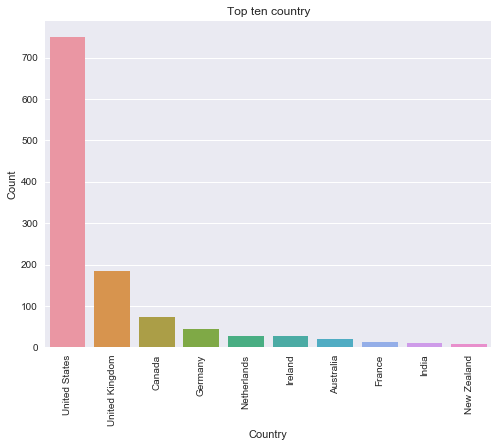

In [11]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

with the graphs we can see the distrubtion of people affected by mental health issues and the top 10 countries that are affected the most by it, by seeing that the US is the highest by leaps and bounds and precursory knowledge that mental health care is lacking in that regard an area for further investigation is to look at how coverage can affect the rates of mental health.

In [13]:
#Cleaning Data for further use
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['Year'] = df['Timestamp'].apply(lambda x:x.year)

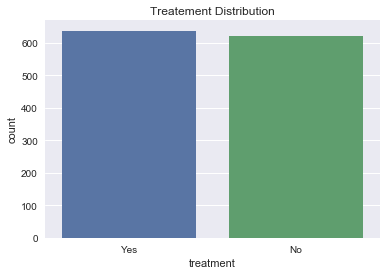

In [12]:
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')

In [14]:
#cleaning Data to make age groups for treatment analysis 
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

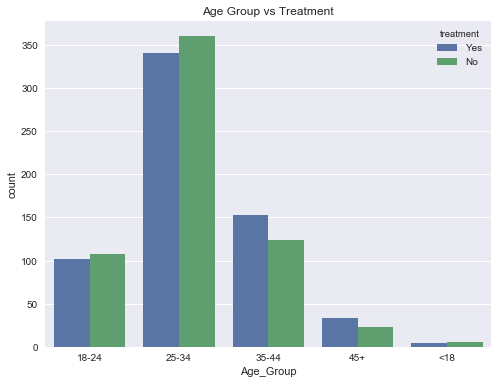

In [16]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

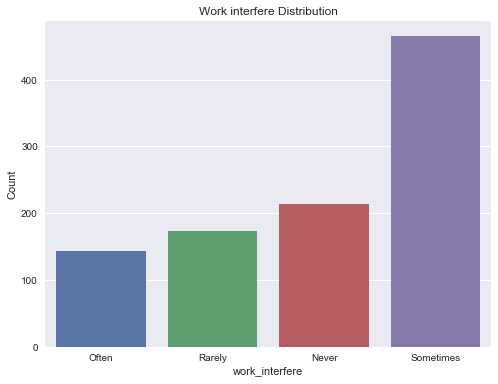

In [17]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

In [20]:
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f', 'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female', 'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer','Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they','nah','Agender','Genderqueer','male leaning androgynous','fluid','trans woman','Female (trans)',"Trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "Trans woman", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

In [21]:
df.Gender = df.Gender = df.Gender.replace(male, 'male')
df.Gender = df.Gender.replace(female, 'female')
df.Gender = df.Gender.replace(trans_other, 'trans/other')

df['Gender'].value_counts()

male                  991
female                247
trans/other            18
A little about you      1
All                     1
p                       1
Name: Gender, dtype: int64

In [25]:
gender_male = df[df.Gender == 'male']
gender_female = df[df.Gender == 'female']
gender_trans = df[df.Gender == 'trans/other']

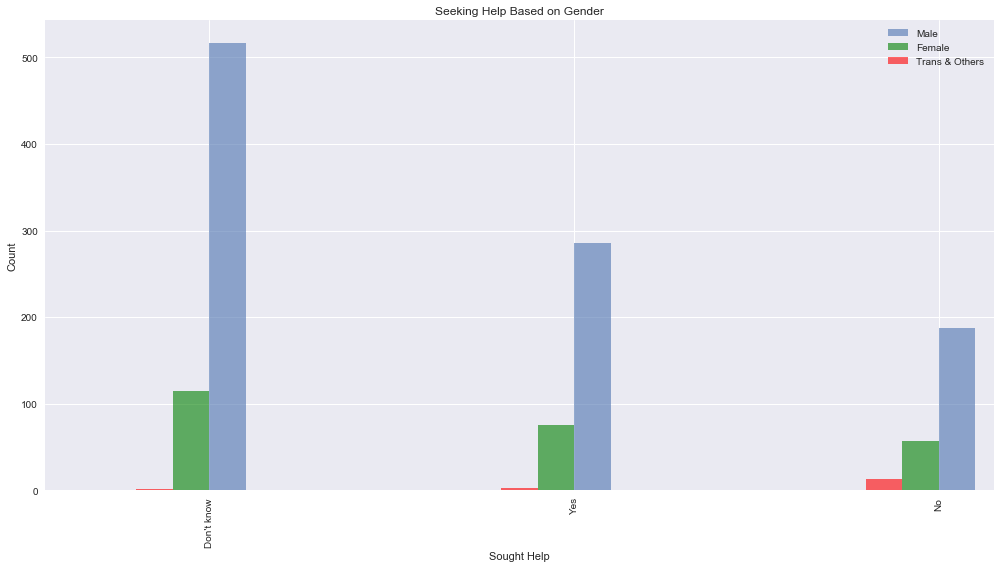

In [26]:
ax = gender_male['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Male', width=0.1, position = 0);
ax = gender_female['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Female', width=0.1, position = 1, color = 'g');
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.1, position = 2, title='Seeking Help Based on Gender')

ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

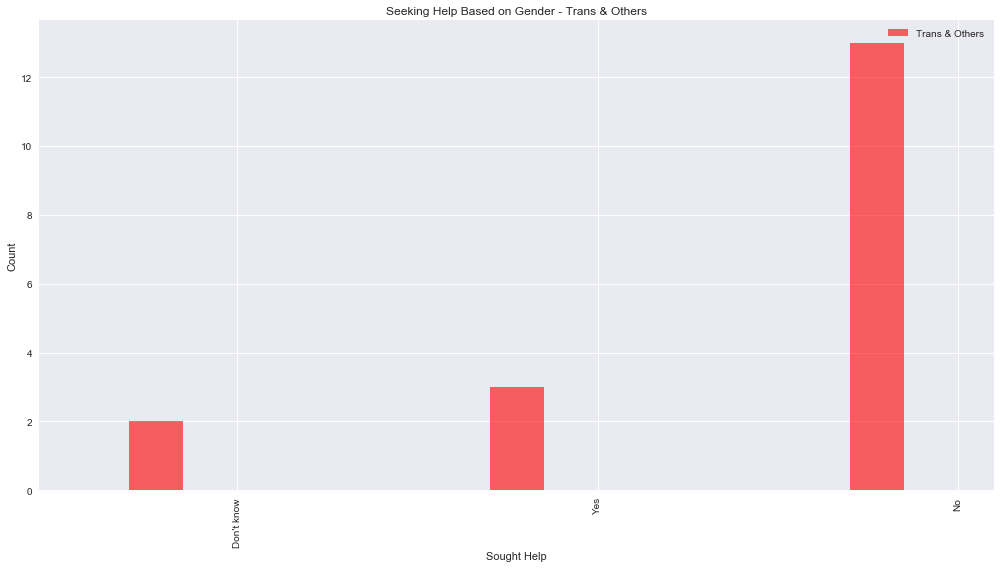

In [27]:
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.15, position = 2, title='Seeking Help Based on Gender - Trans & Others')
ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

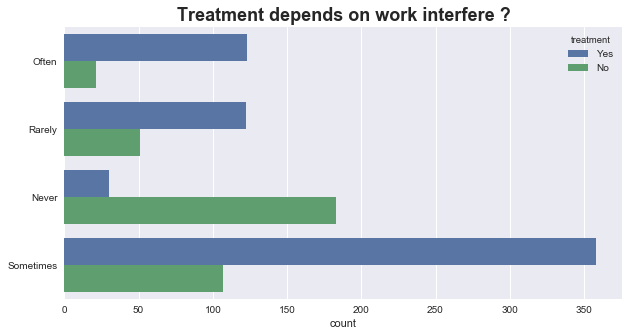

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y="work_interfere", hue="treatment", data=df)
plt.title("Treatment depends on work interfere ?",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()